# 2. Intrusion Detection for Unix Processe

For training, we will use all substrings of a fixed length 7 as it is the shortest line. To be able to use the program, we will create a new text file as the training set.

In [112]:
print("Minimum length: ",min([len(item) for item in open("snd-cert.train").read().splitlines()]))

Minimum length:  7


In [0]:
n = 7

In [0]:
train_str = ""
with open("snd-cert.train") as f:
  for line in f.readlines():
    for substr in [line.strip()[x:x+n] for x in range(0, len(line.strip())//n*n, n)]:
      train_str += substr + "\n"
train_str = train_str[:-1]
with open("cert.train","w") as f:
  f.write(train_str) 

We will also merge the test sets in one file. We have to split each sample in the test set into chunks of length 7 and average over anomaly scores to get the final score. For this purpose, we will have an extra array, ```test_enumerate```. This array will tell us which line belongs to which sample.

In [0]:
test_set = []
test_labels = []
for i in range(1,4):
  with open("snd-cert."+str(i)+".test") as f:
    test_set += f.read().splitlines() 
  with open("snd-cert."+str(i)+".labels") as f:
    test_labels += f.read().splitlines() 

In [0]:
test_enumerate = []
ind = 0
test_str = ""

In [0]:
for i in range(len(test_set)):
  sample = test_set[i]
  for substr in [sample[x:x+n] for x in range(0, len(sample)//n*n, n)]:
      test_str += substr + "\n"
      test_enumerate.append(ind)
  ind += 1
test_str = test_str[:-1]
with open("cert.test","w") as f:
  f.write(test_str) 

In [0]:
#Convert labels to integer
test_labels = list(map(int, test_labels)) 

Now, we will train the negative selection algorithm using "cert.train" and calculate the anomaly scores for the file "cert.test". We will store the output in text files. We will also try different r values.

```
for i in range(1,6)
  java -jar negsel2.jar  -alphabet file://snd-cert.alpha  -self cert.train -n 7 -r 4 -c -l < cert.test > out_cert_test_i.txt
```

We will create a list called ```tuples```similar to first part of the assignment. Number of elements of this list will be equal to number of test samples we have. If a sample is not an anomaly, it will be appended as ```(0,score)``` and if it is an anomaly it will be appended as ```(1,score)```.

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [0]:
def get_tuples(filename,ind,test_enumerate,test_labels):
  scores = []
  with open(filename) as f:
    scores = f.read().splitlines() 
  tuples = []
  file_index = 0
  for curr_ind in range(ind):
    sum_scores = 0
    num_subsamples = 0
    while file_index < len(test_enumerate) and test_enumerate[file_index] == curr_ind:
      sum_scores += float(scores[file_index])
      num_subsamples += 1
      file_index +=1
    tuples.append((str(test_labels[curr_ind]), round(sum_scores/num_subsamples,2)))
  tuples.sort(key=lambda tup: tup[1])
  num_nonself = sum(test_labels)
  num_self = len(test_labels) - sum(test_labels)
  return num_self, num_nonself, tuples

In [0]:
def sens_spec(norm_self,norm_nonself,tuples):
  sens, spec = [], []
  for (label, val) in tuples:
    anom_count, norm_count = 0, 0
    for (label2, val2) in tuples:
        if label2 == "1" and val < val2:
            anom_count += 1
        if label2 == "0" and val > val2:
            norm_count += 1
    sens.append((100/norm_nonself)*anom_count)
    spec.append((100/norm_self)*norm_count)
  return sens,spec

In [0]:
def plot_auc(sens,spec):
  print("AUC: ",auc([1-x/100 for x in spec],[x/100 for x in sens]))
  plt.plot([1-x/100 for x in spec],[x/100 for x in sens])
  plt.plot([x/10 for x in range(0,11,1)], [x/10 for x in range(0,11,1)],'--', color='orange')
  plt.ylabel('sensitivity')
  plt.xlabel('1-specificity')
  plt.show()

AUC:  0.9479806451612902


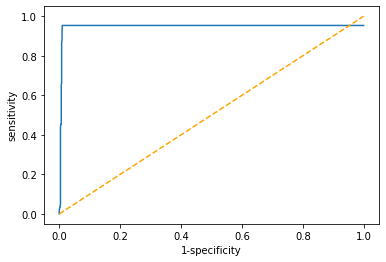

In [95]:
num_self, num_nonself, tuples = get_tuples("out_cert_test_2.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

AUC:  0.9617634408602149


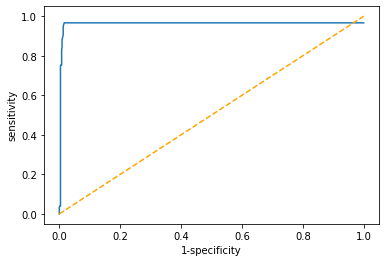

In [96]:
num_self, num_nonself, tuples = get_tuples("out_cert_test_3.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

AUC:  0.9618301075268816


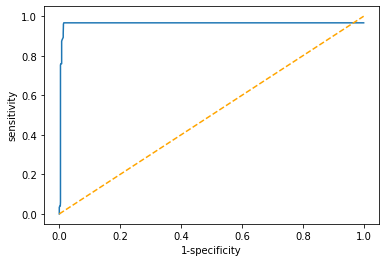

In [97]:
num_self, num_nonself, tuples = get_tuples("out_cert_test_4.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

AUC:  0.9617419354838708


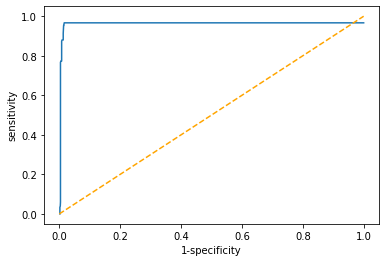

In [98]:
num_self, num_nonself, tuples = get_tuples("out_cert_test_5.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

The best results are obtained using r=4. Now we will do the same procedure for the other dataset as well.

In [111]:
print("Minimum length: ",min([len(item) for item in open("snd-unm.train").read().splitlines()]))

Minimum length:  7


In [0]:
train_str = ""
with open("snd-unm.train") as f:
  for line in f.readlines():
    for substr in [line.strip()[x:x+n] for x in range(0, len(line.strip())//n*n, n)]:
      train_str += substr + "\n"
train_str = train_str[:-1]
with open("unm.train","w") as f:
  f.write(train_str) 

test_set = []
test_labels = []
for i in range(1,4):
  with open("snd-unm."+str(i)+".test") as f:
    test_set += f.read().splitlines() 
  with open("snd-unm."+str(i)+".labels") as f:
    test_labels += f.read().splitlines() 

test_enumerate = []
ind = 0
test_str = ""

for i in range(len(test_set)):
  sample = test_set[i]
  for substr in [sample[x:x+n] for x in range(0, len(sample)//n*n, n)]:
      test_str += substr + "\n"
      test_enumerate.append(ind)
  ind += 1
test_str = test_str[:-1]
with open("unm.test","w") as f:
  f.write(test_str) 

#Convert labels to integer
test_labels = list(map(int, test_labels)) 

AUC:  0.8962860215053763


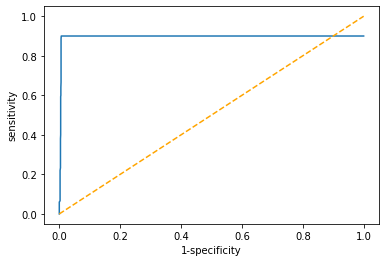

In [100]:
num_self, num_nonself, tuples = get_tuples("out_unm_test_2.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

AUC:  0.9416301075268816


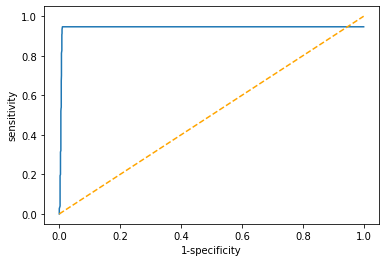

In [101]:
num_self, num_nonself, tuples = get_tuples("out_unm_test_3.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

AUC:  0.948232258064516


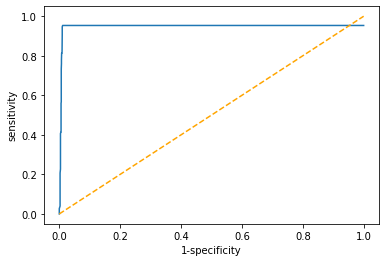

In [113]:
num_self, num_nonself, tuples = get_tuples("out_unm_test_4.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)

AUC:  0.961432258064516


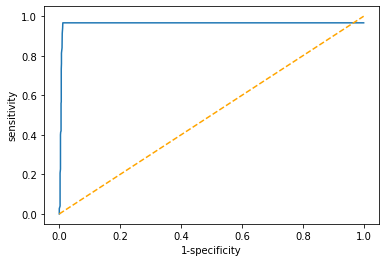

In [114]:
num_self, num_nonself, tuples = get_tuples("out_unm_test_5.txt",ind,test_enumerate,test_labels)
sens,spec = sens_spec(num_self,num_nonself,tuples)
plot_auc(sens,spec)